## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Product Reviews

In [3]:
product_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/product_reviews.csv')

### EDA

In [4]:
product_reviews.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,positive_or_not
0,0785758968:one_of_the_best_crichton_novels:jos...,0785758968,Sphere: Books: Michael Crichton,books,0 of 1,5.0,One of the best Crichton novels,"July 1, 2006",Joseph M,"Colorado, USA",Sphere by Michael Crichton is an excellant nov...,1
1,0452279550:the_medicine_of_the_future:wafa_rashed,0452279550,Healing from the Heart: A Leading Surgeon Comb...,books,34 of 41,4.0,The Medicine of the Future,"November 6, 2002",Wafa Rashed,"Jabriya, KUWAIT",Dr. Oz is an accomplished heart surgeon in the...,1
2,"1599620065:beautiful!:sarah_silva_""sar""",1599620065,Mythology: DC Comics Art of Alex Ross 2007 Cal...,books,NaN,5.0,Beautiful!,"June 13, 2006","Sarah Silva ""Sar""","San Diego, CA USA",The most gorgeous artwork in comic books. Cont...,1
3,0743277724:for_lovers_of_robicheaux:g._rousseau,0743277724,Pegasus Descending: A Dave Robicheaux Novel (D...,books,1 of 1,4.0,For lovers of Robicheaux,"November 2, 2006",G. Rousseau,"Finistere, France",This book is for lovers of Robicheaux. His de...,1
4,061318114X:excellent_and_broad_survey_of_the_d...,061318114X,"Guns, Germs, and Steel: The Fates of Human Soc...",books,7 of 9,5.0,Excellent and broad survey of the development ...,"October 6, 2006","Patrick D. Goonan ""www.meaningful-life.us""","Pleasanton, CA",This is going to be a short and sweet review b...,1


In [5]:
product_reviews.describe()

,rating,positive_or_not
count,8000.000000,8000.000000
mean,3.057250,0.500000
std,1.727598,0.500031
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          8000 non-null   object 
 1   asin               8000 non-null   object 
 2   product_name       8000 non-null   object 
 3   product_type       8000 non-null   object 
 4   helpful            6701 non-null   object 
 5   rating             8000 non-null   float64
 6   title              8000 non-null   object 
 7   date               7999 non-null   object 
 8   reviewer           7833 non-null   object 
 9   reviewer_location  6674 non-null   object 
 10  review_text        8000 non-null   object 
 11  positive_or_not    8000 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 750.1+ KB


In [7]:
sns.heatmap(product_reviews.corr(),annot=True)

ValueError: could not convert string to float: '0785758968:one_of_the_best_crichton_novels:joseph_m'

In [ ]:
sns.countplot(x='rating',data=product_reviews)

In [ ]:
sns.countplot(x='product_type',data=product_reviews)

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='positive_or_not',data=product_reviews)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution - Product Reviews')

In [ ]:
value_counts = product_reviews['positive_or_not'].value_counts()
colours=['#3f55e7','#59ebd0']
value_counts.index = value_counts.index.map({0: 'Negative', 1: 'Positive'})
# Generate the pie chart
plt.figure(figsize=(7, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=-90, colors=colours)
plt.title('Class Distribution - Product Reviews')
plt.show()

In [ ]:
product_reviews['date'] = pd.to_datetime(product_reviews['date'])

In [ ]:
product_reviews['year'] = product_reviews['date'] .dt.year

In [ ]:
sns.countplot(x='year',data=product_reviews)

In [8]:
product_reviews['review_length'] = product_reviews['review_text'].apply(len)

Text(0.5, 1.0, 'Review Length Distribution - Product Reviews')

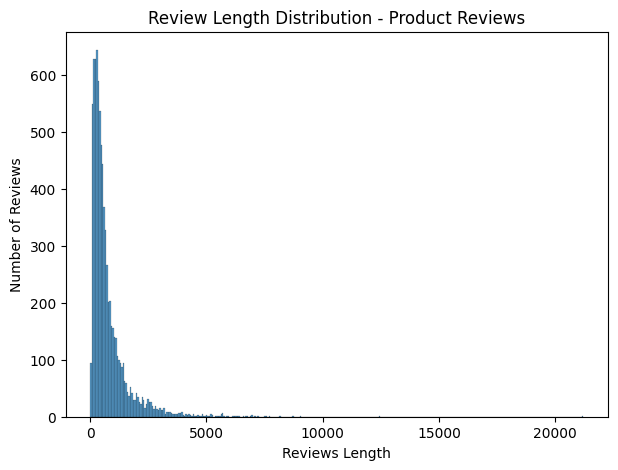

In [15]:
plt.figure(figsize=(7,5))

sns.histplot(product_reviews['review_length'])
plt.xlabel('Reviews Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution - Product Reviews')

In [ ]:
all_words = ' '.join(product_reviews['review_text']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

### Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = product_reviews['review_text'].to_list()
target = product_reviews['positive_or_not'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
tfidf_vectorizer = TfidfVectorizer()
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)
tfidf_data = normalize(tfidf_data, norm='l2', axis=1)

In [ ]:
processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
processed_df['label'] = target

### Word Clouds

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    #tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = product_reviews['review_text'].to_list()
target = product_reviews['positive_or_not'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

In [ ]:
df=pd.DataFrame()
df['reviews']=preprocessed_data
df['positive_or_not']=target

In [ ]:
positive_reviews = df[df['positive_or_not'] == 1]

# Concatenate all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
negative_reviews = df[df['positive_or_not'] == 0]

# Concatenate all positive reviews into a single string
negative_text = " ".join(review for review in negative_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
text = " ".join(review for review in df.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

## Fake Reviews

In [10]:
fake_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/fake_reviews.csv')

### EDA

In [ ]:
fake_reviews.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
fake_reviews.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
fake_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


<Axes: xlabel='rating', ylabel='count'>

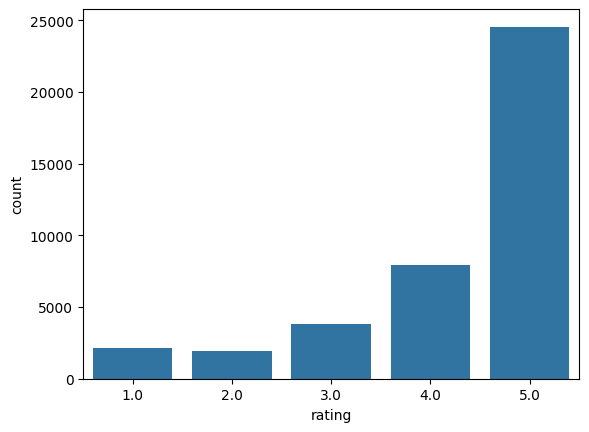

In [ ]:
sns.countplot(x='rating',data=fake_reviews)

Text(0.5, 1.0, 'Class Distribution - Fake Reviews')

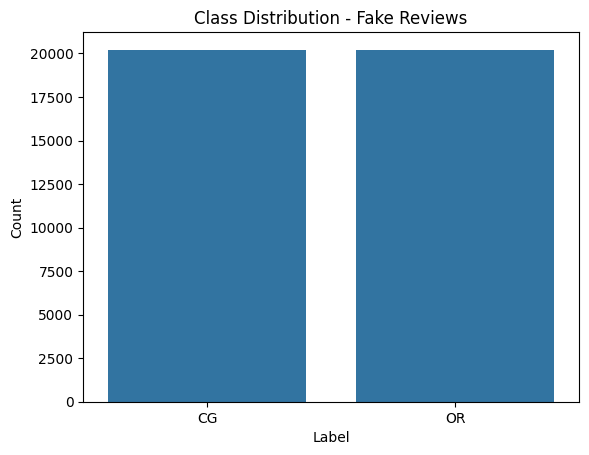

In [ ]:
sns.countplot(x='label',data=fake_reviews)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution - Fake Reviews')

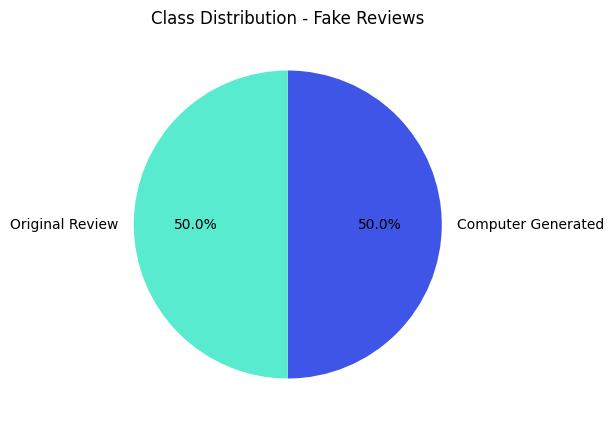

In [ ]:
value_counts = fake_reviews['label'].value_counts()
colours=['#3f55e7','#59ebd0']
value_counts.index = value_counts.index.map({'CG': 'Computer Generated', 'OR': 'Original Review'})
# Generate the pie chart
plt.figure(figsize=(7, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=-90, colors=colours)
plt.title('Class Distribution - Fake Reviews')
plt.show()

<Axes: xlabel='category', ylabel='count'>

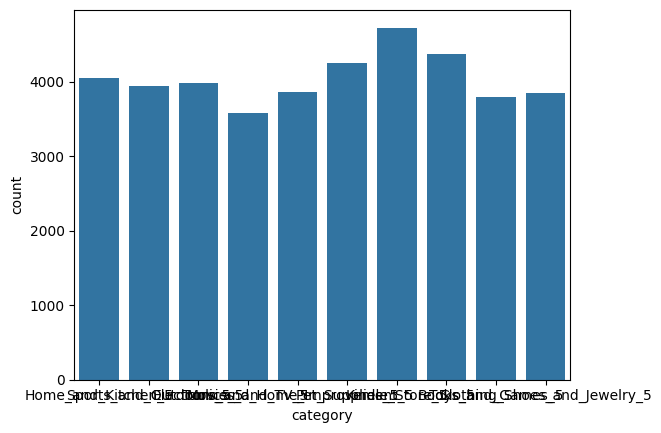

In [ ]:
sns.countplot(x='category',data=fake_reviews)

In [12]:
fake_reviews['review_length'] = fake_reviews['text_'].apply(len)

Text(0.5, 1.0, 'Review Length Distribution - Fake Reviews')

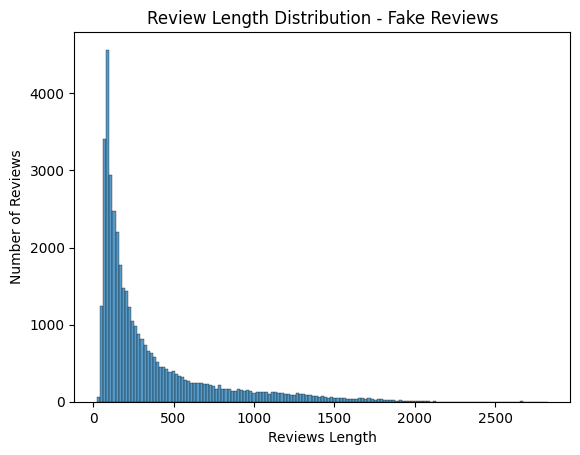

In [14]:
sns.histplot(fake_reviews['review_length'])
plt.xlabel('Reviews Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution - Fake Reviews')

In [ ]:
sns.histplot(fake_reviews['review_length'])
plt.xlabel('Reviews')
plt.ylabel('Review Length')
plt.title('Review Length Distribution - Fake Reviews')

In [ ]:
all_words = ' '.join(fake_reviews['text_']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 125375),
 ('a', 94870),
 ('I', 91688),
 ('and', 86025),
 ('to', 67735),
 ('is', 63943),
 ('', 62066),
 ('it', 45646),
 ('of', 45107),
 ('for', 37686),
 ('this', 36631),
 ('in', 28095),
 ('The', 27962),
 ('was', 25895),
 ('that', 25464),
 ('with', 22811),
 ('have', 22712),
 ('my', 20354),
 ('very', 19073),
 ('are', 18901)]

### Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
tfidf_vectorizer = TfidfVectorizer(max_features=20000)
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)
tfidf_data = normalize(tfidf_data, norm='l2', axis=1)

In [ ]:
processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
processed_df['label'] = target

### Word Cloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    #tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

In [ ]:
preprocessed_data[1]

"love great upgrade original 've mine couple year"

In [ ]:
df=pd.DataFrame()
df['reviews']=preprocessed_data
df['label']=target

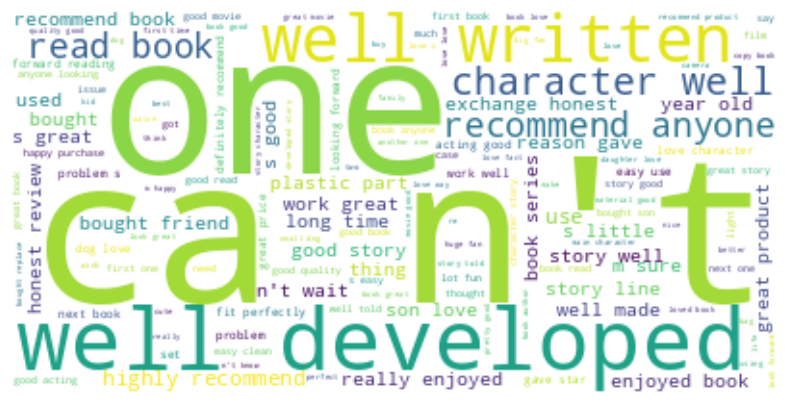

In [ ]:
computer_generated_reviews = df[df['label'] == 'CG']

# Concatenate all positive reviews into a single string
computer_generated_text = " ".join(review for review in computer_generated_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(computer_generated_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

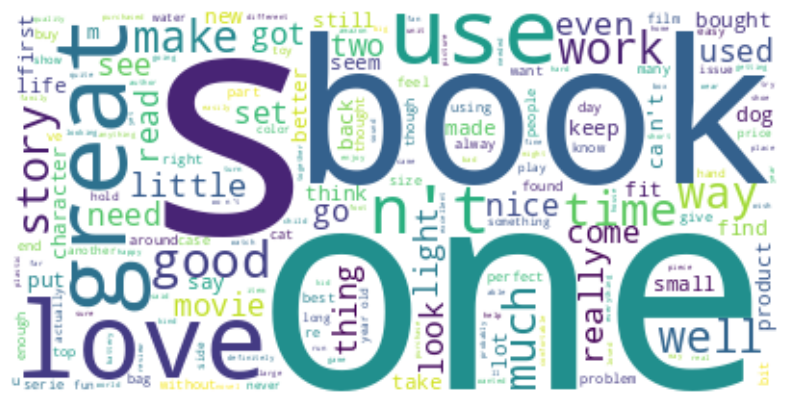

In [ ]:
orginal_reviews = df[df['label'] == 'OR']

# Concatenate all positive reviews into a single string
orginal_text = " ".join(review for review in orginal_reviews.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(orginal_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

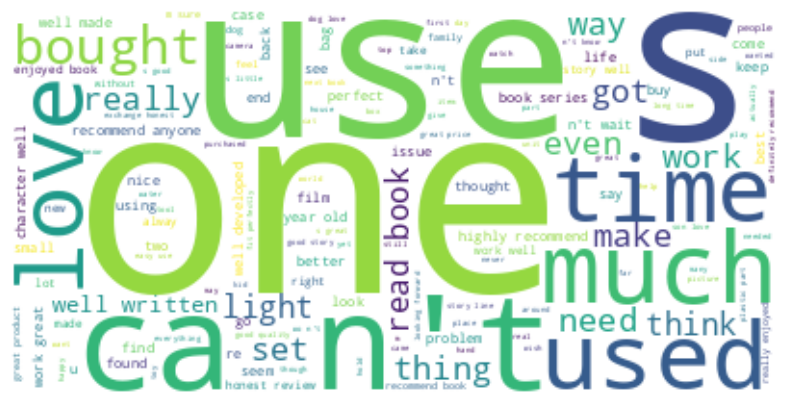

In [ ]:
text = " ".join(review for review in df.reviews)

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()